## Madina Hayva Putri - 5220411187
## Pemrosesan Teks Kelas B

## Tema: Perbandingan Aplikasi Edit Video di PlayStore

### Scraping Data dari 2 aplikasi

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

### 1. Capcut

In [ ]:
result, continuation_token = reviews(
    'com.lemon.lvoverseas',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)
data1 = pd.DataFrame(np.array(result), columns=['review'])
data1 = data1.join(pd.DataFrame(data1.pop('review').tolist()))
data1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,85282d43-2eec-4df8-a611-fd0607deaf5d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Apalah cik, semuanya kok disuruh pro. Hey, cap...",1,1714,16.4.0,2026-01-09 16:43:30,None,NaT,16.4.0
1,b6057f68-f410-4f36-a031-6891226903da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Fiturnya sekarang banyak yang berbayar, padaha...",2,162,16.2.0,2026-01-05 05:08:10,Thanks for your feedback. Try switching Wi-Fi/...,2026-01-06 04:43:40,16.2.0
2,c2782f27-116d-4327-a356-0c0022f62b45,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dulu bagus bangett, dan sekarang juga masih ba...",2,88,16.2.0,2026-01-06 08:26:09,None,NaT,16.2.0
3,0f31e504-7949-45cf-938f-8635229b52b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sebenarnya aplikasi capcut ini seru karna bisa...,5,335,16.3.0,2026-01-09 14:50:22,None,NaT,16.3.0
4,2138e249-b0b5-4230-8410-301bb9dbc0f3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi CapCut sangat membantu untuk edit vid...,3,46,16.0.0,2026-01-06 13:26:04,None,NaT,16.0.0


In [ ]:
data1_baru = data1[['userName', 'content', 'score']]
data1 = data1_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data1.head()

,Nama Akun,ulasan,rating
0,Pengguna Google,"Apalah cik, semuanya kok disuruh pro. Hey, cap...",1
1,Pengguna Google,"Fiturnya sekarang banyak yang berbayar, padaha...",2
2,Pengguna Google,"Dulu bagus bangett, dan sekarang juga masih ba...",2
3,Pengguna Google,sebenarnya aplikasi capcut ini seru karna bisa...,5
4,Pengguna Google,Aplikasi CapCut sangat membantu untuk edit vid...,3


In [ ]:
data1['rating'].value_counts()

,count
rating,
1,2637
5,743
2,650
3,546
4,424


### preprocessing data

In [ ]:
!pip install nltk
!pip install Sastrawi
!pip install emoji

In [ ]:
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df1 = pd.DataFrame(data1)

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
stop_words = set(stopwords.words('indonesian'))

# stopwords tambahan
custom_stopwords = [
    # sapaan & basa-basi
    'halo', 'hai', 'hi', 'hello', 'gan', 'bro', 'sis', 'min', 'admin', 'neng',

    # kata umum tidak bermakna sentimen
    'tolong', 'mohon', 'terima', 'kasih', 'thanks', 'makasih',
    'dong', 'nih', 'sih', 'deh', 'aja', 'kok', 'lah', 'yah', 'ya',
    'terimakasih', 'kali', 'ko', 'cuma', 'cuman', 'semoga', 'silahkan',
    'moga', 'pokok', 'hehee', 'hehe', 'wkwk', 'pliss', 'makasii', 'kadang',
    'kdg', 'assalamualaikum', 'nyaa', 'pokoknya', 'assalamu', 'poko', 'dehh',
    'gapapa', 'plss', 'ajaa', 'apa', 'trimakasih', 'sihh', 'bismillah', 'plis',
    'kesini', 'poko', 'gimana', 'malah', 'ayo', 'guys', 'fikss', 'pokonya',
    'apaa', 'assamualaikum', 'oke', 'oiya', 'okelah', 'kali',

    # konteks aplikasi
    'aplikasi', 'app', 'apk', 'capcut', 'inshot', 'editan', 'editnya', 'edit',
    'video', 'aplikasinya', 'aplikasih', 'vidio', 'editing', 'editor',
    'videonya', 'videoin', 'apps', 'apknya', 'insot', 'inshoot',

    # kata umum berfrekuensi tinggi
    'yang', 'dan', 'atau', 'untuk', 'dengan', 'pada', 'dari',
    'ini', 'itu', 'jadi', 'kalo', 'kalau', 'paling', 'lagi', 'kayak',
    'terus', 'trus', 'drpd', 'kaya', 'gini', 'gin', 'meng', 'gitu', 'doang'
]

stop_words.update(custom_stopwords)

In [ ]:
slang_dict = {
    'gk': 'tidak',
    'ga': 'tidak',
    'nggak': 'tidak',
    'ngga' : 'tidak',
    'nggk' : 'tidak',
    'ngak' : 'tidak',
    'tdk' : 'tidak',
    'bgt': 'banget',
    'dr': 'dari',
    'krn': 'karena',
    'karna': 'karena',
    'tp': 'tapi',
    'aja': 'saja',
    'eror': 'error',
    'erorr': 'error',
    'erorrs': 'error',
    'nontonya': 'nonton',
    'nntn' : 'nonton',
    'loginya': 'login',
    'ngedit' : 'edit',
    'udah' : 'sudah',
    'sudh' : 'sudah',
    'kalo' : 'kalau',
    'baguss' : 'bagus',
    'bagusss' : 'bagus',
    'bagu' : 'bagus',
    'bagussss': 'bagus',
    'ngebug' : 'bug',
    'ngelag' : 'lag',
    'skrg' : 'sekarang',
    'skarang' : 'sekarang',
    'skrng' :'sekarang',
    'gabisa' : 'tidak bisa',
    'bikin' : 'membuat',
    'pake' : 'pakai',
    'kodek' : 'codec',
    'gajelas' : 'tidak jelas',
    'kasi' : 'kasih',
    'beaar' : 'besar',
    'pdhl' : 'padahal',
    'ngonten' : 'konten',
    'donlot' : 'download',
    'fidio' : 'video',
    'capcup' : 'capcut',
    'bgtt' :'banget',
    'ngeditnya' : 'edit',
    'kalok' : 'kalo',
    'kagak': 'tidak',
    'senilai' : 'nilai',
    'terllu' : 'terlalu',
    'dikurangi' : 'kurang',
    'gaje' : 'tidak jelas',
    'kurangin':'kurang',
    'ngelek' : 'lag',
    'ngeleg' : 'lag',
    'gerakan' : 'gerak',
    'gerakin' : 'gerak',
    'fade' : 'fase',
    'kopi' : 'copy',
    'instal' : 'install',
    'sampe' : 'sampai',
    'pakek' : 'pakai',
    'make' : 'pakai',
    'makek' : 'pakai',
    'bugnya' : 'bug',
    'gede' : 'besar',
    'bisaa' : 'bisa',
    'capcutnya' : 'capcut',
    'inshotnya' : 'inshot',
    'hilangin' : 'hilang',
    'hilangkan' : 'hilang',
    'loadingnya' : 'loading',
    'gada' : 'tidak ada',
    'gaada' : 'tidak ada',
    'gaadaa' : 'tidak ada',
    'gaadaaa' : 'tidak ada',
    'donlowad' : 'download',
    'mengupdate' : 'update',
    'bngt' : 'banget',
    'fiturnya' : 'fitur',
    'bnget' : 'banget',
    'maap' : 'maap',
    'hrus' : 'harus',
    'mesti' : 'pasti',
    'bnyk' : 'banyak',
    'prlu' : 'perlu',
    'sikit' : 'dikit',
    'mnjawab':'menjawab',
    'menjawab' : 'jawab',
    'mnit' : 'menit',
    'mlah' : 'malah',
    'nemu' : 'temu',
    'pnghilanh' : 'penghilang',
    'penghilang' : 'hilang',
    'muas' : 'muak',
    'sring' : 'sering',
    'nyesel' : 'sesal',
    'kesel' : 'kesal',
    'bajakan' : 'bajak',
    'ngasih' : 'kasih',
    'tpii' : 'tapi',
    'nempelin' : 'tempel',
    'ngeblur' : 'blur',
    'burem':'buram',
    'tambahin':'tambah',
    'nambah':'tambah',
    'seneng':'senang',
    'tetep' : 'tetap',
    'bangett':'banget',
    'mulu':'terus',
    'ngerti':'erti',
    'cupcat':'capcut',
    'padahaal':'padahal',
    'pengen':'ingin',
    'donwlod':'download',
    'bagusloh':'bagus',
    'sebenernya': 'benar',
    'sebenarnya':'benar',
    'balekk' :'balik',
    'bntg':'bintang',
    'kkarna': 'karena',
    'kkrna' : 'karena',
    'orng': 'orang',
    'org': 'orang',
    'blng':'bilang',
    'bilng':'bilang',
    'ilang':'hilang'
}

In [ ]:
def text_preprocessing(text, stop_words, slang_dict, stemmer):
    # 1. Casefolding
    text = text.lower()

    # 2. Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 3. Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 4. Hapus angka, tanda baca, simbol, dan karakter non-huruf
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Hapus emoji
    text = emoji.demojize(text)

    # 6. Tokenisasi
    tokens = word_tokenize(text)

    # 7. Normalisasi huruf berulang (asikkk → asik)
    tokens = [re.sub(r'(.)\1{2,}', r'\1\1', word) for word in tokens]

    # 8. Normalisasi kata gaul / typo
    tokens = [slang_dict.get(word, word) for word in tokens]

    # 9. Hapus stopword
    tokens = [word for word in tokens if word not in stop_words]

    # 10. Hapus kata dengan panjang ≤ 3 huruf
    tokens = [word for word in tokens if len(word) > 3]

    # 11. Stemming (Bahasa Indonesia)
    protected_words = {'bagus', 'lemot', 'alasan', 'nilai', 'install', 'kurang', 'sekarang', 'gerak', 'sampai', 'bajak'}
    tokens = [w if w in protected_words else stemmer.stem(w) for w in tokens]

    # 12. Kembalikan ke bentuk string
    return ' '.join(tokens)

In [ ]:
df1["Clean_Comment"] = df1["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df1.head()

,Nama Akun,ulasan,rating,Clean_Comment
0,Pengguna Google,"Apalah cik, semuanya kok disuruh pro. Hey, cap...",1,apa suruh raup untung beda bisnis bisnis kikir...
1,Pengguna Google,"Fiturnya sekarang banyak yang berbayar, padaha...",2,fitur bayar kesal lemot banget banget text spe...
2,Pengguna Google,"Dulu bagus bangett, dan sekarang juga masih ba...",2,bagus banget bagus kurang lumayan iklan fitur ...
3,Pengguna Google,sebenarnya aplikasi capcut ini seru karna bisa...,5,seru foto bayar standar jengkel suka error fot...
4,Pengguna Google,Aplikasi CapCut sangat membantu untuk edit vid...,3,bantu fitur lengkap mudah hasil bagus cocok mu...


In [ ]:
#cek data kosong
df1.isnull().sum()

,0
Nama Akun,0
ulasan,0
rating,0
Clean_Comment,0


In [ ]:
#cek data yang sama
df1.duplicated().any()

np.False_

### pelabelan data

In [ ]:
def sentiment_from_rating(r):
    if r >= 4:
        return 'Positive'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Negative'

df1['sentiment_rating'] = df1['rating'].apply(sentiment_from_rating)

In [ ]:
with open('/content/positive.tsv', 'r') as f:
    next(f)
    positive_words = [line.strip().split('\t')[0] for line in f if line.strip()]

with open('/content/negative.tsv', 'r') as f:
    next(f)
    negative_words = [line.strip().split('\t')[0] for line in f if line.strip()]

In [ ]:
def sentiment_lexicon(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in positive_words:
            pos += 1
        elif word in negative_words:
            neg += 1

    if pos > neg:
        return 'Positive'
    elif neg > pos:
        return 'Negative'
    else:
        return 'Neutral'
df1['sentiment_lexicon'] = df1['Clean_Comment'].apply(sentiment_lexicon)

In [ ]:
print("Jumlah data awal :", len(df1))

# Validasi: rating == lexicon
df1_valid = df1[df1['sentiment_rating'] == df1['sentiment_lexicon']].copy()
df1_invalid = df1[df1['sentiment_rating'] != df1['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df1_valid))
print("Jumlah data tidak valid (dihapus) :", len(df1_invalid))

Jumlah data awal : 5000
Jumlah data setelah validasi : 1597
Jumlah data tidak valid (dihapus) : 3403


In [ ]:
df1_valid['app_name'] = 'CapCut'

## Distribusi Data

In [ ]:
rating_counts = df1['sentiment_rating'].value_counts()
lexicon_counts = df1['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

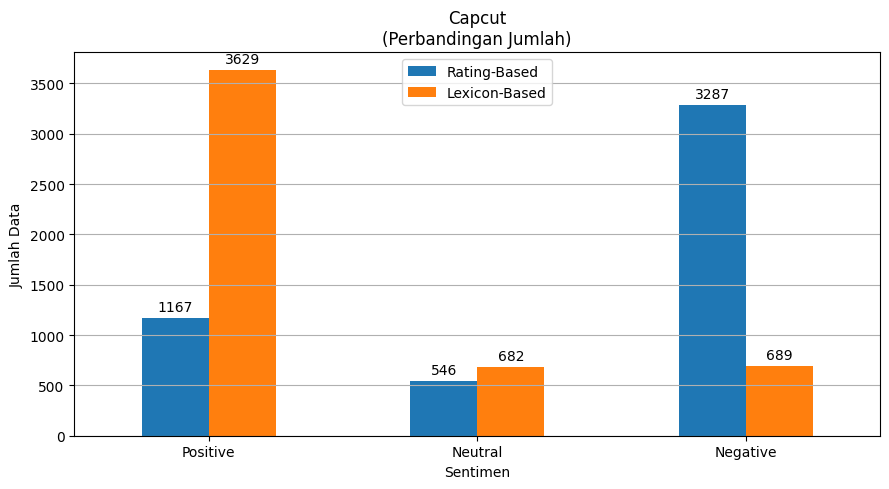

In [ ]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('Capcut\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

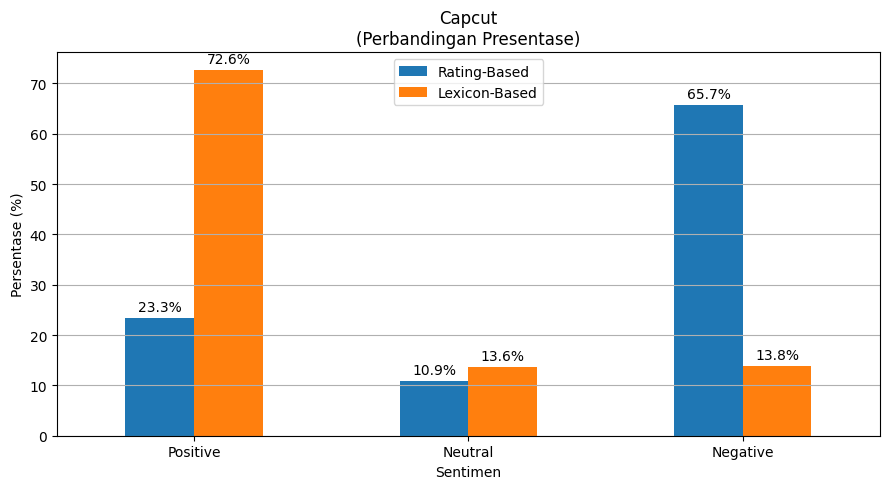

In [ ]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('Capcut\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
df1.head()

,Nama Akun,ulasan,rating,Clean_Comment,sentiment_rating,sentiment_lexicon
0,Pengguna Google,"Apalah cik, semuanya kok disuruh pro. Hey, cap...",1,apa suruh raup untung beda bisnis bisnis kikir...,Negative,Positive
1,Pengguna Google,"Fiturnya sekarang banyak yang berbayar, padaha...",2,fitur bayar kesal lemot banget banget text spe...,Negative,Positive
2,Pengguna Google,"Dulu bagus bangett, dan sekarang juga masih ba...",2,bagus banget bagus kurang lumayan iklan fitur ...,Negative,Positive
3,Pengguna Google,sebenarnya aplikasi capcut ini seru karna bisa...,5,seru foto bayar standar jengkel suka error fot...,Positive,Positive
4,Pengguna Google,Aplikasi CapCut sangat membantu untuk edit vid...,3,bantu fitur lengkap mudah hasil bagus cocok mu...,Neutral,Positive


In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_capcut.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
def plot_ngram(df, sentiment, n, text_col,
               app_name="CapCut", top_n=10):

    texts = df[df["sentiment_lexicon"] == sentiment][text_col]
    if texts.empty:
        print(f"Tidak ada data untuk {sentiment}")
        return

    vec = CountVectorizer(ngram_range=(n, n), min_df=1)
    X = vec.fit_transform(texts)

    df_ngram = (
        pd.DataFrame({
            "Ngram": vec.get_feature_names_out(),
            "Frekuensi": X.sum(axis=0).A1
        })
        .sort_values("Frekuensi", ascending=False)
        .head(top_n)
    )

    palette = {
        "Positive": "Greens_r",
        "Neutral": "Blues_r",
        "Negative": "Reds_r"
    }

    ax = sns.barplot(
        data=df_ngram,
        x="Frekuensi", y="Ngram",
        hue="Ngram",
        palette=palette.get(sentiment, "viridis"),
        legend=False
    )

    ngram_name = "Bi-gram" if n == 2 else "Tri-gram"
    ax.set_title(f"{app_name}\n{ngram_name} Sentimen {sentiment}")
    ax.set_xlabel("Frekuensi")
    ax.set_ylabel("")

    for p in ax.patches:
        ax.text(
            p.get_width() + 0.3,
            p.get_y() + p.get_height()/2,
            int(p.get_width()),
            va="center",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

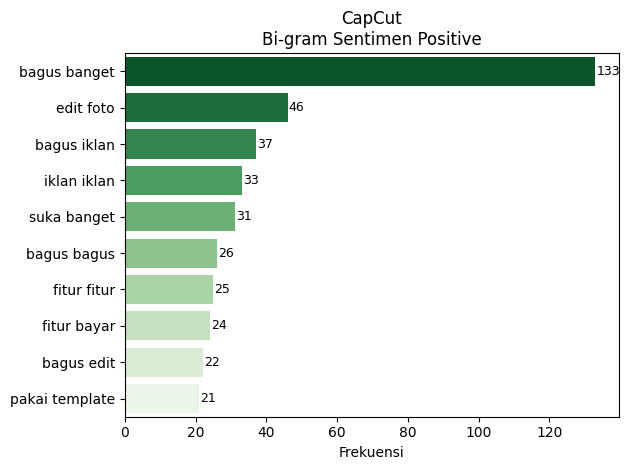

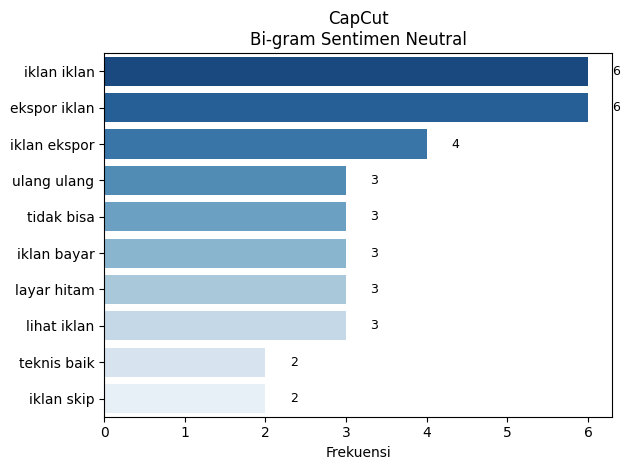

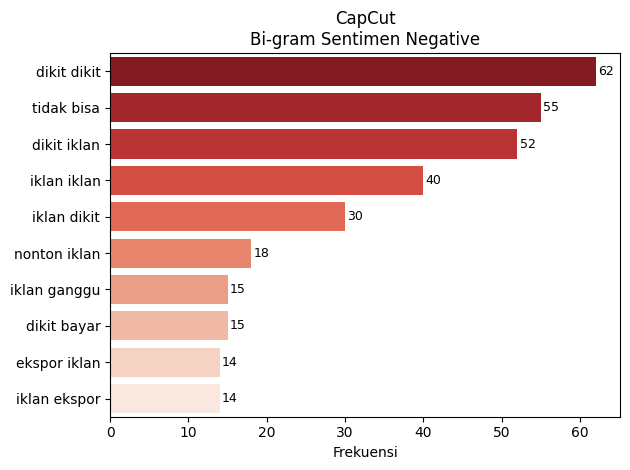

In [ ]:
# Bi-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df1_valid,
        sentiment=sent,
        text_col='Clean_Comment',
        n=2,
        top_n=10,
        app_name="CapCut"
    )

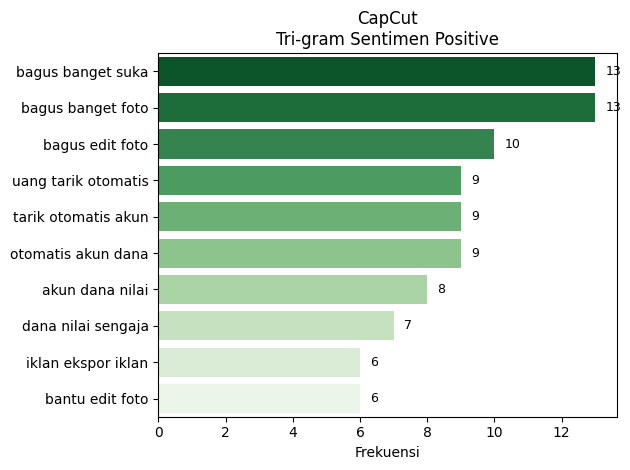

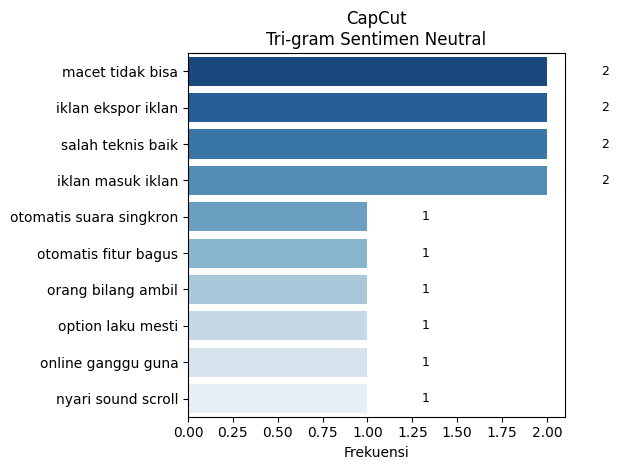

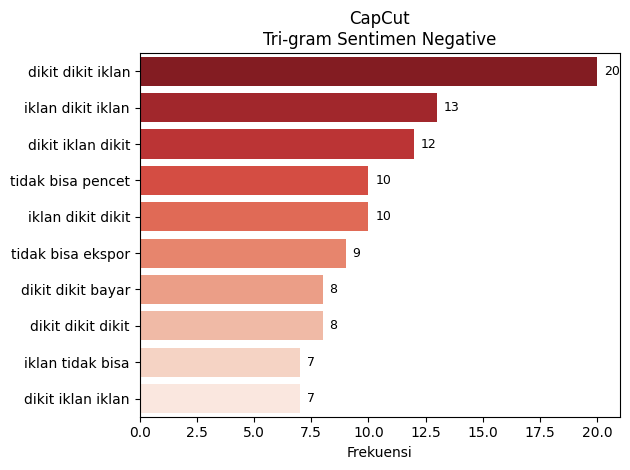

In [ ]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df1_valid,
        sentiment=sent,
        text_col='Clean_Comment',
        n=3,
        top_n=10,
        app_name="CapCut"
    )

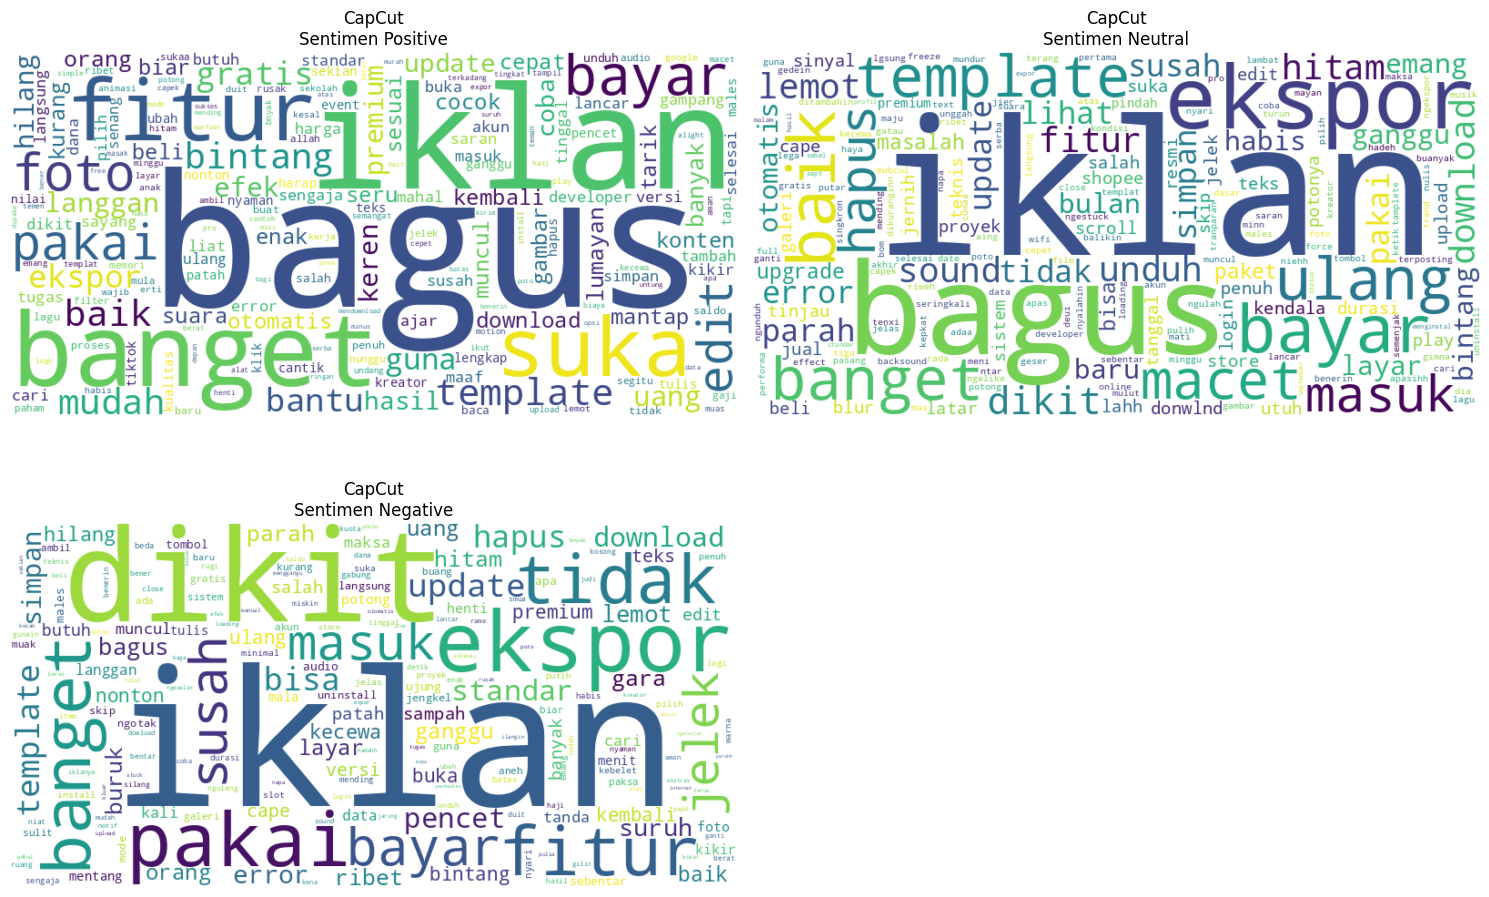

In [ ]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df1_valid[df1_valid['sentiment_lexicon'] == sent]['Clean_Comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"CapCut\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## Pemodelan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df1_valid['Clean_Comment']
y = df1_valid['sentiment_lexicon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data splitting complete.
Shape of X_train: (1277,)
Shape of X_test: (320,)
Shape of y_train: (1277,)
Shape of y_test: (320,)


## Eksperimen 1: BoW + Logistic Regression

In [ ]:
!pip install imblearn

In [ ]:
bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

lr_bow = LogisticRegression(max_iter=500)
lr_bow.fit(X_train_bow, y_train)
pred_bow_lr = lr_bow.predict(X_test_bow)

accuracy_bow_lr = accuracy_score(y_test, pred_bow_lr)
print(f"Accuracy (BoW + Logistic Regression): {accuracy_bow_lr:.4f}\n")

print("Classification Report (BoW + Logistic Regression):\n")
print(classification_report(y_test, pred_bow_lr, zero_division=0))

Accuracy (BoW + Logistic Regression): 0.8938

Classification Report (BoW + Logistic Regression):

              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88       109
     Neutral       0.50      0.07      0.12        15
    Positive       0.90      0.97      0.93       196

    accuracy                           0.89       320
   macro avg       0.76      0.64      0.64       320
weighted avg       0.88      0.89      0.88       320



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train)}")

# Vektorisasi BoW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test) # X_test_bow juga perlu dibuat untuk prediksi selanjutnya

# Aplikasi SMOTE pada data BoW
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_bow, y_train)

print(f"Distribusi kelas setelah SMOTE: {Counter(y_train_smote)}")

Distribusi kelas sebelum SMOTE: Counter({'Positive': 785, 'Negative': 433, 'Neutral': 59})
Distribusi kelas setelah SMOTE: Counter({'Positive': 785, 'Negative': 785, 'Neutral': 785})


In [ ]:
lr_bow_smote = LogisticRegression(max_iter=500)
lr_bow_smote.fit(X_train_smote, y_train_smote)
pred_bow_lr_smote = lr_bow_smote.predict(X_test_bow)

accuracy_bow_lr_smote = accuracy_score(y_test, pred_bow_lr_smote)
print(f"Accuracy (BoW + SMOTE + Logistic Regression): {accuracy_bow_lr_smote:.4f}\n")

print("Classification Report (BoW + SMOTE + Logistic Regression):\n")
print(classification_report(y_test, pred_bow_lr_smote, zero_division=0))

Accuracy (BoW + SMOTE + Logistic Regression): 0.8656

Classification Report (BoW + SMOTE + Logistic Regression):

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90       109
     Neutral       0.19      0.40      0.26        15
    Positive       0.96      0.89      0.92       196

    accuracy                           0.87       320
   macro avg       0.69      0.73      0.69       320
weighted avg       0.90      0.87      0.88       320



## Eksperimen 2: TF-IDF + SVM

In [ ]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

model_svm_tfidf = LinearSVC()
model_svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_svm_tfidf.predict(X_test_tfidf)

accuracy_tfidf_svm = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy (TF-IDF + SVM): {accuracy_tfidf_svm:.4f}\n")

print("Classification Report (TF-IDF + SVM):\n")
print(classification_report(y_test, y_pred_tfidf))

Accuracy (TF-IDF + SVM): 0.8969

Classification Report (TF-IDF + SVM):

              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88       109
     Neutral       0.33      0.07      0.11        15
    Positive       0.90      0.98      0.94       196

    accuracy                           0.90       320
   macro avg       0.71      0.64      0.64       320
weighted avg       0.88      0.90      0.88       320



In [ ]:
print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train)}")

# Vektorisasi TF-IDF
vectorizer_tfidf_smote = TfidfVectorizer()
X_train_tfidf_smote = vectorizer_tfidf_smote.fit_transform(X_train)
X_test_tfidf_smote = vectorizer_tfidf_smote.transform(X_test)

# Aplikasi SMOTE pada data TF-IDF
smote_tfidf = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote_tfidf.fit_resample(X_train_tfidf_smote, y_train)

print(f"Distribusi kelas setelah SMOTE: {Counter(y_train_resampled)}")

Distribusi kelas sebelum SMOTE: Counter({'Positive': 785, 'Negative': 433, 'Neutral': 59})
Distribusi kelas setelah SMOTE: Counter({'Positive': 785, 'Negative': 785, 'Neutral': 785})


In [ ]:
# Latih model LinearSVC dengan data yang sudah di-SMOTE
model_svm_tfidf_smote = LinearSVC(max_iter=1000)
model_svm_tfidf_smote.fit(X_train_tfidf_resampled, y_train_resampled)
y_pred_tfidf_smote = model_svm_tfidf_smote.predict(X_test_tfidf_smote)

accuracy_tfidf_svm_smote = accuracy_score(y_test, y_pred_tfidf_smote)
print(f"Accuracy (TF-IDF + SMOTE + SVM): {accuracy_tfidf_svm_smote:.4f}\n")

print("Classification Report (TF-IDF + SMOTE + SVM):\n")
print(classification_report(y_test, y_pred_tfidf_smote, zero_division=0))

Accuracy (TF-IDF + SMOTE + SVM): 0.8719

Classification Report (TF-IDF + SMOTE + SVM):

              precision    recall  f1-score   support

    Negative       0.93      0.83      0.88       109
     Neutral       0.19      0.27      0.22        15
    Positive       0.92      0.94      0.93       196

    accuracy                           0.87       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.89      0.87      0.88       320



## 2. INSHOT

In [ ]:
result, continuation_token = reviews(
    'com.camerasideas.instashot',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)
data2 = pd.DataFrame(np.array(result), columns=['review'])
data2 = data2.join(pd.DataFrame(data2.pop('review').tolist()))
data2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,65fa43e9-4020-4e3b-b47b-cc4bf8be3d2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya udah enak, dan kayaknya akan lebih...",3,1,2.175.1517,2026-01-04 22:58:58,"Pengguna yang terhormat, Kami selalu berupaya ...",2026-01-05 03:21:02,2.175.1517
1,b0c8ae55-c240-443d-86f3-4cd206a26b69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3,3,2.175.1517,2025-12-28 18:11:44,Halo. Maaf atas masalah ini. Kami ingin menget...,2025-12-29 05:45:15,2.175.1517
2,23e95c86-3bcb-4068-a862-83fde3f0e349,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apknya bagus cuman suara rekamanku terputus2 p...,5,28,2.183.1521,2026-01-04 14:28:13,"Halo, Kami ingin mengetahui detail masalah yan...",2025-11-03 07:49:24,2.183.1521
3,c49f85d5-edea-42cd-8f0d-2797e51ee70b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyak bgttttttttttt bugg nyaaa!!!!! freeze mu...,1,5,2.184.1522,2026-01-08 04:20:42,"Halo, Kami ingin mengetahui detail masalah yan...",2026-01-08 07:07:11,2.184.1522
4,02cd7f93-ef97-469c-85d4-120835090374,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"suka banget ngga bikin hp jadi lalot, cocok ba...",5,199,2.162.1510,2025-10-27 03:49:11,None,NaT,2.162.1510


In [ ]:
data2_baru = data2[['userName', 'content', 'score']]
data2 = data2_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data2.head()

,Nama Akun,ulasan,rating
0,Pengguna Google,"Aplikasinya udah enak, dan kayaknya akan lebih...",3
1,Pengguna Google,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3
2,Pengguna Google,apknya bagus cuman suara rekamanku terputus2 p...,5
3,Pengguna Google,banyak bgttttttttttt bugg nyaaa!!!!! freeze mu...,1
4,Pengguna Google,"suka banget ngga bikin hp jadi lalot, cocok ba...",5


In [ ]:
data2['rating'].value_counts()

,count
rating,
5,2990
4,806
3,516
1,415
2,273


### preprocessing data

In [ ]:
df2 = pd.DataFrame(data2)

In [ ]:
df2["clean_comment"] = df2["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df2.head()

,Nama Akun,ulasan,rating,clean_comment
0,Pengguna Google,"Aplikasinya udah enak, dan kayaknya akan lebih...",3,enak kayak senang text laku layer utama dapet ...
1,Pengguna Google,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3,error kayak mati nyala simpan hasil kali ngula...
2,Pengguna Google,apknya bagus cuman suara rekamanku terputus2 p...,5,bagus suara rekam putus selesai asli bagus sua...
3,Pengguna Google,banyak bgttttttttttt bugg nyaaa!!!!! freeze mu...,1,banget bugg freeze banget nungguinnya simpan e...
4,Pengguna Google,"suka banget ngga bikin hp jadi lalot, cocok ba...",5,suka banget lalot cocok banget tugas kuliah si...


In [ ]:
#cek data kosong
df2.isnull().sum()

,0
Nama Akun,0
ulasan,0
rating,0
clean_comment,0


In [ ]:
#cek data yang sama
df2.duplicated().any()

np.True_

In [ ]:
# hapus data duplikat
df2.drop_duplicates(inplace=True)

In [ ]:
# cek lagi, apakah masih ada data duplikat?
df2.duplicated().any()

np.False_

### pelabelan data

In [ ]:
df2['sentiment_rating'] = df2['rating'].apply(sentiment_from_rating)

In [ ]:
df2['sentiment_lexicon'] = df2['clean_comment'].apply(sentiment_lexicon)

In [ ]:
print("Jumlah data awal :", len(df2))

# Validasi: rating == lexicon
df2_valid = df2[df2['sentiment_rating'] == df2['sentiment_lexicon']].copy()
df2_invalid = df2[df2['sentiment_rating'] != df2['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df2_valid))
print("Jumlah data tidak valid (dihapus) :", len(df2_invalid))

Jumlah data awal : 4999
Jumlah data setelah validasi : 3642
Jumlah data tidak valid (dihapus) : 1357


In [ ]:
df2_valid['app_name'] = 'Inshot'

## Distribusi Data

In [ ]:
rating_counts = df2['sentiment_rating'].value_counts()
lexicon_counts = df2['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

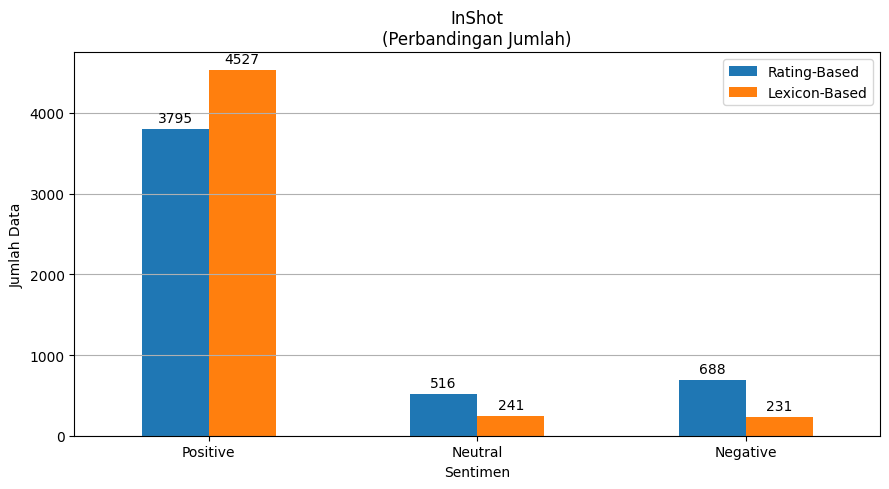

In [ ]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('InShot\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

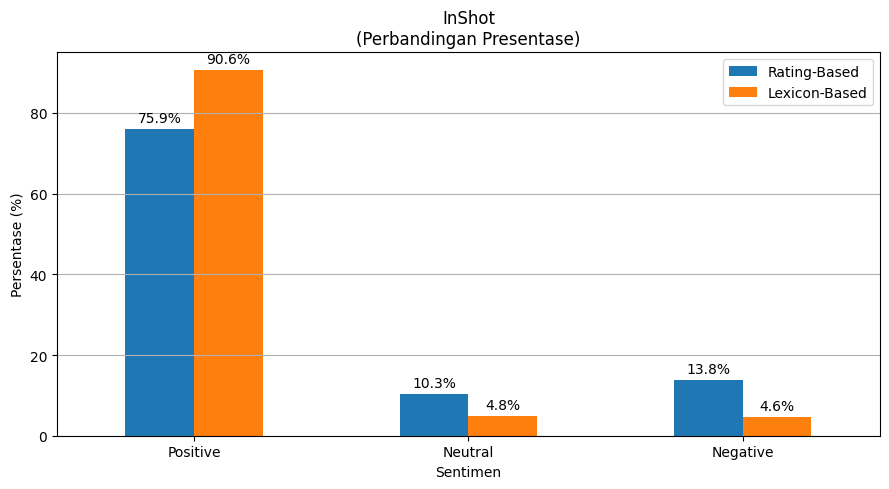

In [ ]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('InShot\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
df2.head()

,Nama Akun,ulasan,rating,clean_comment,sentiment_rating,sentiment_lexicon
0,Pengguna Google,"Aplikasinya udah enak, dan kayaknya akan lebih...",3,enak kayak senang text laku layer utama dapet ...,Neutral,Positive
1,Pengguna Google,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3,error kayak mati nyala simpan hasil kali ngula...,Neutral,Neutral
2,Pengguna Google,apknya bagus cuman suara rekamanku terputus2 p...,5,bagus suara rekam putus selesai asli bagus sua...,Positive,Positive
3,Pengguna Google,banyak bgttttttttttt bugg nyaaa!!!!! freeze mu...,1,banget bugg freeze banget nungguinnya simpan e...,Negative,Positive
4,Pengguna Google,"suka banget ngga bikin hp jadi lalot, cocok ba...",5,suka banget lalot cocok banget tugas kuliah si...,Positive,Positive


In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_inshotr.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

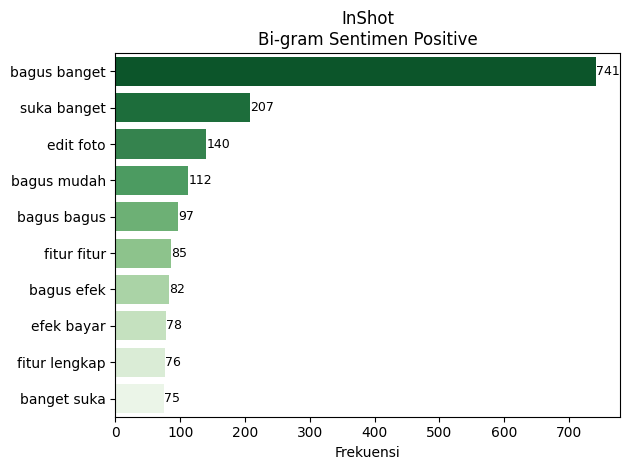

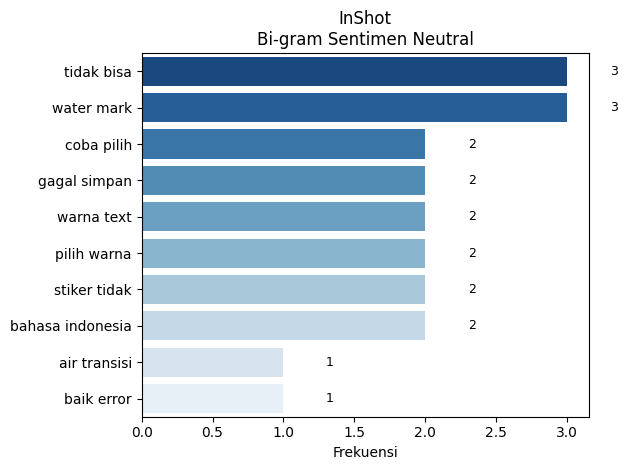

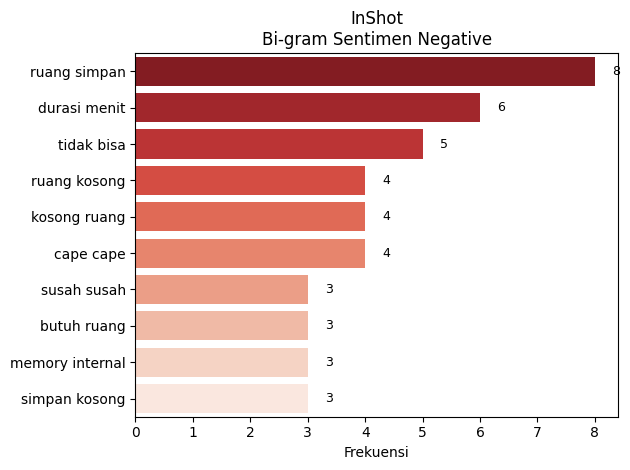

In [ ]:
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df2_valid,
        sentiment=sent,
        text_col='clean_comment',
        n=2,
        top_n=10,
        app_name="InShot"
    )

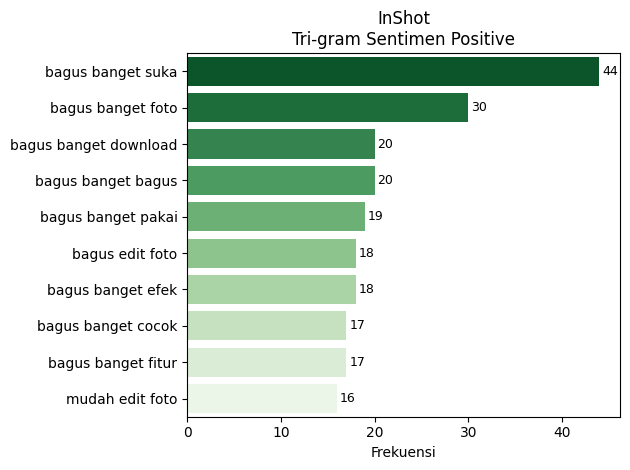

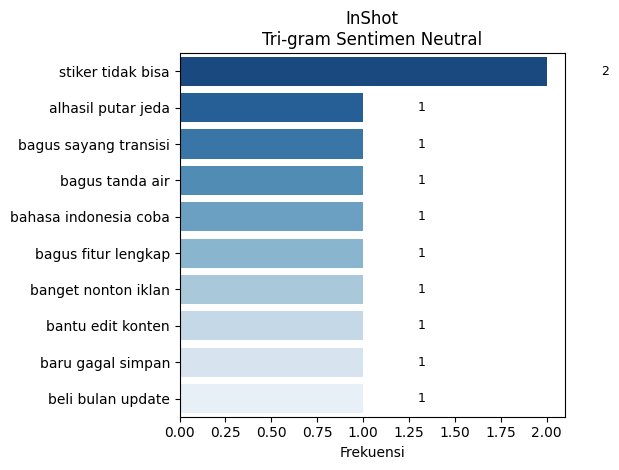

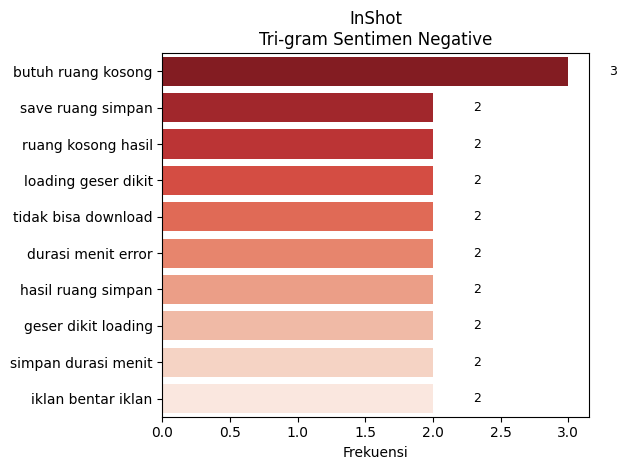

In [ ]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df2_valid,
        sentiment=sent,
        text_col='clean_comment',
        n=3,
        top_n=10,
        app_name="InShot"
    )

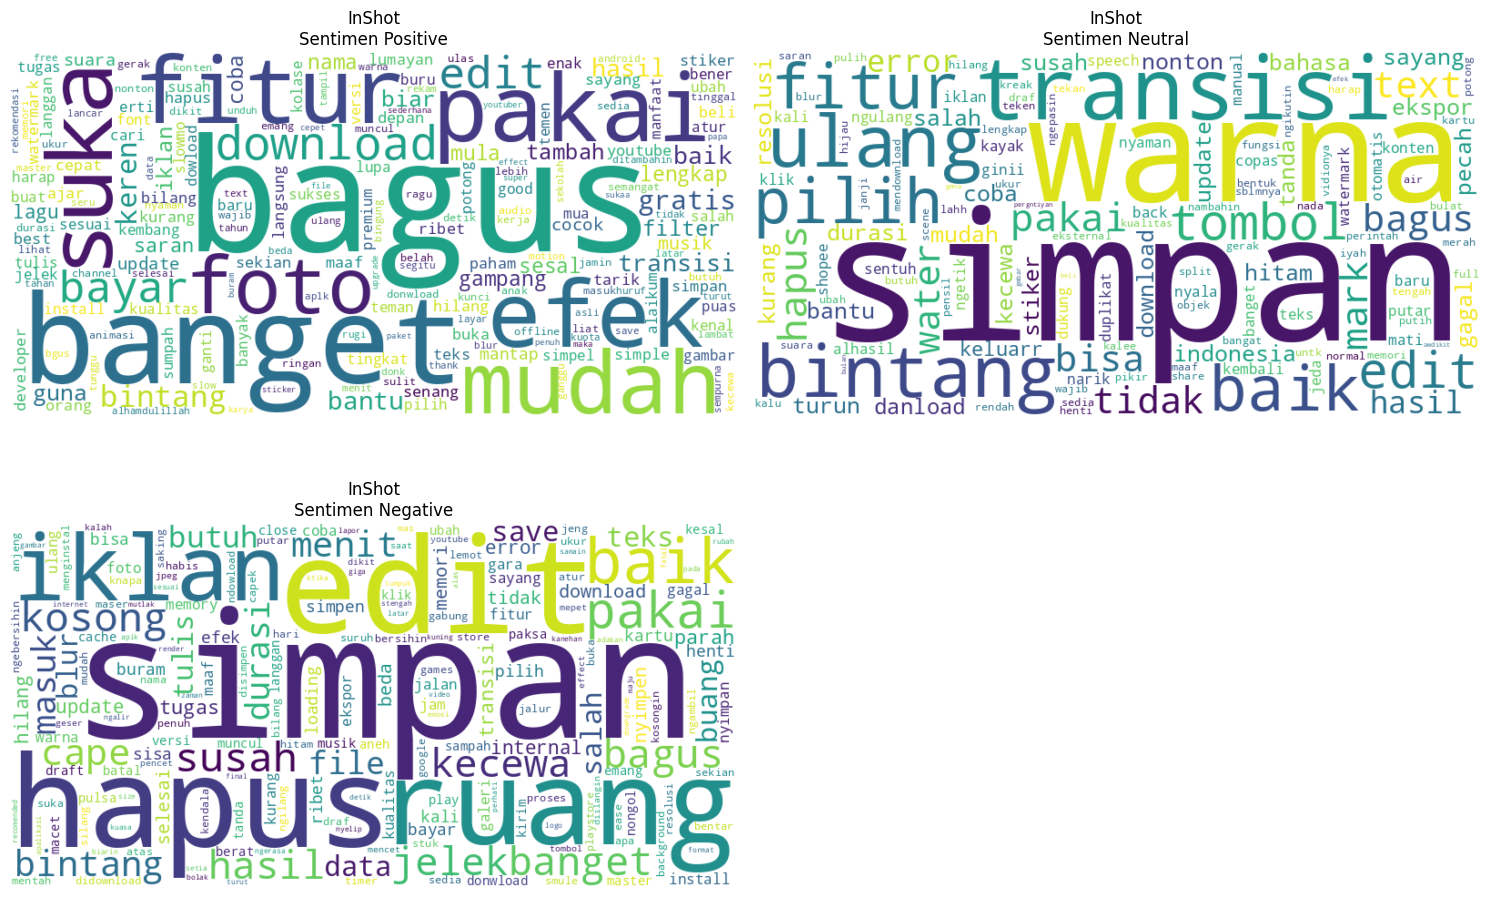

In [ ]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df2_valid[df2_valid['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"InShot\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## Perbandingan Total Data Setelah Validasi

In [ ]:
df_all_valid = pd.concat([
    df1_valid,
    df2_valid
])

In [ ]:
df_plot = (
    df_all_valid['sentiment_rating']
    .groupby(df_all_valid['app_name'])
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

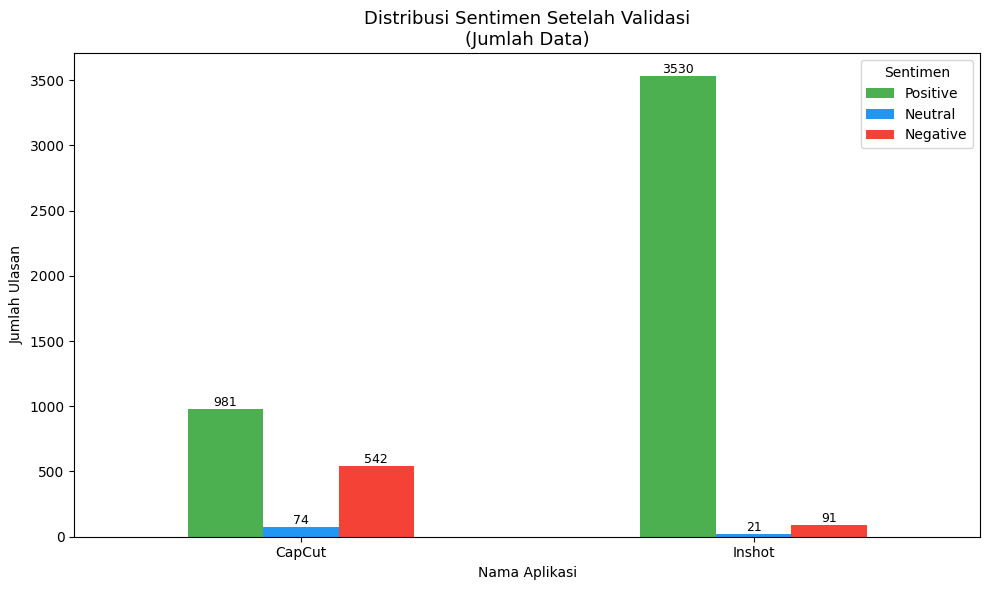

In [ ]:
df_plot.set_index('app_name')[['Positive','Neutral','Negative']].plot(
    kind='bar',
    figsize=(10,6),
    color=['#4CAF50', '#2196F3', '#F44336']
)

plt.title(
    "Distribusi Sentimen Setelah Validasi\n(Jumlah Data)",
    fontsize=13
)
plt.xlabel("Nama Aplikasi")
plt.ylabel("Jumlah Ulasan")
plt.legend(title="Sentimen")

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

## Pemodelan

In [ ]:
X = df2_valid['clean_comment']
y = df2_valid['sentiment_lexicon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data splitting complete.
Shape of X_train: (2913,)
Shape of X_test: (729,)
Shape of y_train: (2913,)
Shape of y_test: (729,)


## Eksperimen 1: BoW + Logistic Regression

In [ ]:
bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

lr_bow = LogisticRegression(max_iter=500)
lr_bow.fit(X_train_bow, y_train)
pred_bow_lr = lr_bow.predict(X_test_bow)

accuracy_bow_lr = accuracy_score(y_test, pred_bow_lr)
print(f"Accuracy (BoW + Logistic Regression): {accuracy_bow_lr:.4f}\n")

print("Classification Report (BoW + Logistic Regression):\n")
print(classification_report(y_test, pred_bow_lr))

Accuracy (BoW + Logistic Regression): 0.9794

Classification Report (BoW + Logistic Regression):

              precision    recall  f1-score   support

    Negative       0.82      0.50      0.62        18
     Neutral       0.00      0.00      0.00         4
    Positive       0.98      1.00      0.99       707

    accuracy                           0.98       729
   macro avg       0.60      0.50      0.54       729
weighted avg       0.97      0.98      0.98       729



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train)}")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_bow, y_train)

print(f"Distribusi kelas setelah SMOTE: {Counter(y_train_smote)}")

Distribusi kelas sebelum SMOTE: Counter({'Positive': 2823, 'Negative': 73, 'Neutral': 17})
Distribusi kelas setelah SMOTE: Counter({'Positive': 2823, 'Negative': 2823, 'Neutral': 2823})


In [ ]:
lr_bow_smote = LogisticRegression(max_iter=500)
lr_bow_smote.fit(X_train_smote, y_train_smote)
pred_bow_lr_smote = lr_bow_smote.predict(X_test_bow)

accuracy_bow_lr_smote = accuracy_score(y_test, pred_bow_lr_smote)
print(f"Accuracy (BoW + SMOTE + Logistic Regression): {accuracy_bow_lr_smote:.4f}\n")

print("Classification Report (BoW + SMOTE + Logistic Regression):\n")
print(classification_report(y_test, pred_bow_lr_smote, zero_division=0))

Accuracy (BoW + SMOTE + Logistic Regression): 0.9588

Classification Report (BoW + SMOTE + Logistic Regression):

              precision    recall  f1-score   support

    Negative       0.48      0.78      0.60        18
     Neutral       0.00      0.00      0.00         4
    Positive       0.99      0.97      0.98       707

    accuracy                           0.96       729
   macro avg       0.49      0.58      0.53       729
weighted avg       0.97      0.96      0.97       729



## Eksperimen 2: TF-IDF + Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


model_nb_tfidf = MultinomialNB()
model_nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb_tfidf.predict(X_test_tfidf)

accuracy_tfidf_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy (TF-IDF + Naive Bayes): {accuracy_tfidf_nb:.4f}\n")

print("Classification Report (TF-IDF + Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb, zero_division=0))

Accuracy (TF-IDF + Naive Bayes): 0.9698

Classification Report (TF-IDF + Naive Bayes):

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        18
     Neutral       0.00      0.00      0.00         4
    Positive       0.97      1.00      0.98       707

    accuracy                           0.97       729
   macro avg       0.32      0.33      0.33       729
weighted avg       0.94      0.97      0.95       729



In [ ]:
print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train)}")

# Vektorisasi TF-IDF
vectorizer_tfidf_smote = TfidfVectorizer()
X_train_tfidf_smote = vectorizer_tfidf_smote.fit_transform(X_train)
X_test_tfidf_smote = vectorizer_tfidf_smote.transform(X_test)

# Aplikasi SMOTE pada data TF-IDF
smote_tfidf = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote_tfidf.fit_resample(X_train_tfidf_smote, y_train)

print(f"Distribusi kelas setelah SMOTE: {Counter(y_train_resampled)}")

Distribusi kelas sebelum SMOTE: Counter({'Positive': 2823, 'Negative': 73, 'Neutral': 17})
Distribusi kelas setelah SMOTE: Counter({'Positive': 2823, 'Negative': 2823, 'Neutral': 2823})


In [ ]:
nb_tfidf_smote = MultinomialNB()
nb_tfidf_smote.fit(X_train_smote, y_train_smote)
pred_tfidf_nb_smote = nb_tfidf_smote.predict(X_test_tfidf)

accuracy_tfidf_nb_smote = accuracy_score(y_test, pred_tfidf_nb_smote)
print(f"Accuracy (TF-IDF + SMOTE + Naive Bayes): {accuracy_tfidf_nb_smote:.4f}\n")

print("Classification Report (TF-IDF + SMOTE + Naive Bayes):\n")
print(classification_report(y_test, pred_tfidf_nb_smote, zero_division=0))

Accuracy (TF-IDF + SMOTE + Naive Bayes): 0.9534

Classification Report (TF-IDF + SMOTE + Naive Bayes):

              precision    recall  f1-score   support

    Negative       0.36      0.83      0.50        18
     Neutral       0.00      0.00      0.00         4
    Positive       0.99      0.96      0.98       707

    accuracy                           0.95       729
   macro avg       0.45      0.60      0.49       729
weighted avg       0.97      0.95      0.96       729

